# Part 3: Modelling nerve stimulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Single-site recruitment curves and selectivity

### <b>(a)</b> `(3 points)` 
#### Consider 7 active sites in locations
#### $$ 
  \begin{cases}
    x = (j-3)l, \\
    y = 0
  \end{cases} $$ 
#### with $l=2$, $j$ $\epsilon$ $[0,7]$. Plot the single-site recruitment curves for the three groups of fibers whose locations are distributed according to multivariate gaussians with the following parameters $\mu_{1}$ = [1, 2], σ = 1, $N_{1}$ = 100, $\mu_{2}$ = [−2, 5], $\sigma_{2}$ = 2, $N_2$ = 100, $\mu_3$ = [3, −6], $\sigma_3$ = 3, $N_3$ = 250 if activation of a fiber in $(x, y)$ is given by act = 1$[V (x, y) > \theta]$ with $\theta = 1$, $\sigma = 1$, $I \epsilon [0, 10]$ ⊂ ${\rm I\!R}$ (you can try 10 different values).

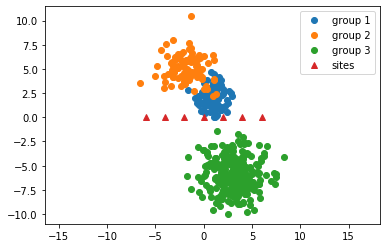

In [65]:
# Random seed
np.random.seed(42)
# Create normal distributions
x1, y1 = np.random.multivariate_normal([1,2],[[1, 0], [0, 1]], 100).T
x2, y2 = np.random.multivariate_normal([-2,5],[[2, 0], [0, 2]], 100).T
x3, y3 = np.random.multivariate_normal([3,-6],[[3, 0], [0, 3]], 250).T
# Create sites
sites = [-6, -4, -2, 0, 2, 4, 6]
# Plotting
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, 'o')
plt.plot(x3, y3, 'o')
plt.plot(sites, np.zeros(np.size(sites)), '^')
plt.axis('equal')
plt.legend(["group 1","group 2","group 3","sites"])
plt.show()

In [66]:
# Constants
Vth = 1
conductance = 1

In [67]:
# Define variables to store results of distances
dist_group1 = np.zeros((np.size(x1),np.size(sites)))
dist_group2 = np.zeros((np.size(x2),np.size(sites)))
dist_group3 = np.zeros((np.size(x3),np.size(sites)))
# Compute the distances between the sites and each of the group points
for j,site in enumerate(sites):
    for i in range (0, np.size(x1)):
        dist_group1[i][j] = np.linalg.norm(np.array((site,0)) - np.array((x1[i],y1[i])))
    for i in range (0, np.size(x2)):
        dist_group2[i][j] = np.linalg.norm(np.array((site,0)) - np.array((x2[i],y2[i])))
    for i in range (0, np.size(x3)):
        dist_group3[i][j] = np.linalg.norm(np.array((site,0)) - np.array((x3[i],y3[i])))

In [68]:
# Create an array of values of I
Is = np.linspace(0, 31.4, 30)
# Varaibles to store
V_group1 = list()
V_group2 = list()
V_group3 = list()
# Compute the value of V (In this case I have reach to the conclusion that the formula is V = I*distance/area*conductance)
for I in Is:
    V_group1.append(I*dist_group1/(np.pi * dist_group1**2)*conductance)
    V_group2.append(I*dist_group2/(np.pi * dist_group2**2)*conductance)
    V_group3.append(I*dist_group3/(np.pi * dist_group3**2)*conductance)

In [69]:
# Create variables to store
recru_act_1 = np.zeros((len(Is),7))
recru_act_2 = np.zeros((len(Is),7))
recru_act_3 = np.zeros((len(Is),7))
# Compute the activation recrutation range
for i,I in enumerate(Is):
    for j in range(0,7):
        recru_act_1[i,j] = sum(V_group1[i][:,j]>1)/len(x1)
        recru_act_2[i,j] = sum(V_group2[i][:,j]>1)/len(x2)
        recru_act_3[i,j] = sum(V_group3[i][:,j]>1)/len(x3)

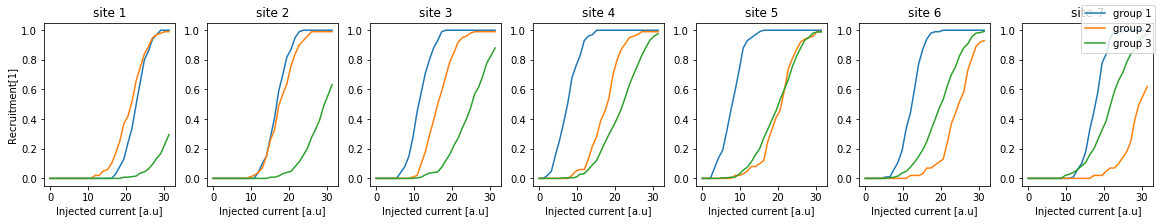

In [70]:
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=7, constrained_layout=True, figsize=(16, 3))
ax = ax.ravel()
for i in range(0,7):
    ax[i].plot(Is,recru_act_1[:,i])
    ax[i].plot(Is,recru_act_2[:,i])
    ax[i].plot(Is,recru_act_3[:,i])
    ax[i].set_title("site {}".format(i+1))
    ax[i].set_xlabel("Injected current [a.u]")
ax[0].set_ylabel("Recruitment[1]")
fig.legend(["group 1", "group 2", "group 3"])

We can appreciate that the most difficult group to reach is the third one.
In site 1 and 2 groups 1 and 2 have almost the same behaviour. This phenomena happens in site 5 for groups 2 and 3 too.

### <b>(b)</b> `(2 points)` 
####  Compute the selectivity corresponding to the simulated stimulation protocols and identify the stimulation protocols that lead to the highest selectivity of stimulation of each group and compute the total selectivity. Provide an interpretation to your results

In [71]:
# Compute selectivities
sel1 = recru_act_1-1/2*(recru_act_2+recru_act_3)
sel2 = recru_act_2-1/2*(recru_act_1+recru_act_3)
sel3 = recru_act_3-1/2*(recru_act_1+recru_act_2)

In [72]:
# Compute and show maximum selectivities and total
print("Maximum selectivities")
print("=====================")
print("group1 : {}".format(np.max(sel1)))
print("group2 : {:,.3f}".format(np.max(sel2)))
print("group3 : {:,.3f}".format(np.max(sel3)))
print("")
total_selectivity = 1/3*(np.max(sel1)+np.max(sel2)+np.max(sel3))
print("Maximum selectivity : {:,.3f}".format(total_selectivity))

Maximum selectivities
group1 : 0.884
group2 : 0.432
group3 : 0.215

Maximum selectivity : 0.510


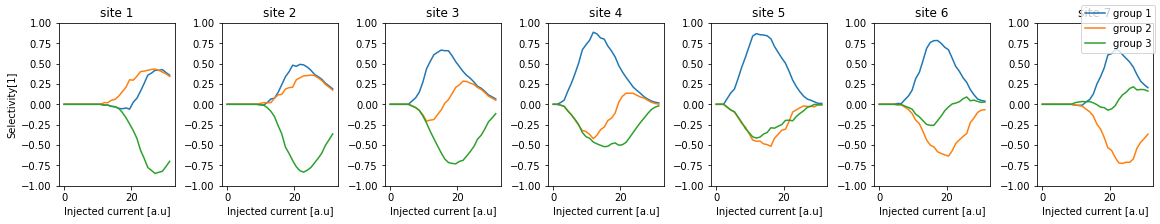

In [73]:
# Plot results
fig, ax = plt.subplots(nrows=1, ncols=7, constrained_layout=True, figsize=(16, 3))
ax = ax.ravel()
for i in range(0,7):
    ax[i].plot(Is,sel1[:,i])
    ax[i].plot(Is,sel2[:,i])
    ax[i].plot(Is,sel3[:,i])
    ax[i].set_title("site {}".format(i+1))
    ax[i].set_xlabel("Injected current [a.u]")
    ax[i].set_ylim(-1,1)
ax[0].set_ylabel("Selectivity[1]")
fig.legend(["group 1", "group 2", "group 3"])

As expected the most difficult to select group is the third one. This is due to the distribution of the points. They are not reachable alone because they are further.

### <b>(c)</b> `(4 points)` 
#### Suppose that you are allowed to rotate/displace the electrode (apply $xy$ rotation matrix/add same vector to site locations). Can you find the insertion that gives the best total selectivity? Provide an interpretation to your results.

In [61]:
H = np.array([sel1[3,:], sel2[3,:], sel3[3,:]])

In [63]:
M = 3*(3-1)**-1*np.eye(3)-(3-1)**-1*np.ones(3)
S = np.zeros((3,7))

for i in range(0,7):
    H = np.array([sel1[i,:], sel2[i,:], sel3[i,:]]
    print(np.matmul(M,H))

SyntaxError: invalid syntax (<ipython-input-63-cb0c0b17808e>, line 6)

In [59]:
np.matmul(M,H)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 3)

## 2. Multi-site stimulation optimization

### <b>(a)</b> `(2 points)` 
####  Can you improve the group-wise maximum selectivities obtained in Question 1(b) (note: the electrode is again as in Question 1(a))? 
#### Try to manually tweak the currents and report your findings.
#### _Hint: to optimize you will need to use a derivative-free optimization method (you are trying to optimize a piece-wise constant function). You may use genetic algorithms or particle swarm optimization._

### <b>(b)</b> `(4 points)` 
#### Build an optimization routine (see the hint above) to find the best multi-site stimulation protocols. Report the best multi-site total selectivity and provide an interpretation to your results.
#### _Hint: now the optimization variables are the seven current values from the sites. Currents can now be negative to allow steering. Consider each group separately._
#### _Hint 2: you will need to perform a lot of tries (I did 10 independent runs for the optimization using 100 particles for 1000 generations) to obtain decent results. Why?_

In [74]:
! jupyter nbconvert --to html Part3.ipynb

[NbConvertApp] Converting notebook Part3.ipynb to html
[NbConvertApp] Writing 462246 bytes to Part3.html
